In [1]:
#Import dependencies and read csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Chicago_Licenses.csv")
df.head()

/Users/gallasteguicrino/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,22308-20060816,1723393,29481,1,BELL OIL TERMINAL INC,Bell Oil Terminal LLC,3741 S PULASKI RD 1,CHICAGO,IL,60623,...,08/16/2006,08/15/2007,08/10/2006,08/11/2006,AAI,NaN,NaN,41.825320,-87.723960,"(41.82531992987547, -87.72395999659746)"
1,1620668-20160516,2455262,295026,1,BUCCI BIG & TALL INC.,BUCCI BIG & TALL INC.,558 W ROOSEVELT RD,CHICAGO,IL,60607,...,05/16/2016,05/15/2018,05/18/2016,08/30/2016,AAI,NaN,NaN,41.867339,-87.641590,"(41.86733856638269, -87.64159005699716)"
2,2368602-20160616,2460909,291461,3,"PROJECT: VISION , INC.","PROJECT : VISION , INC",2301 S ARCHER AVE 1 1,CHICAGO,IL,60616,...,06/16/2016,06/15/2017,06/21/2016,06/22/2016,AAC,08/30/2016,NaN,41.850843,-87.638734,"(41.85084294374687, -87.63873424399071)"
3,2060891-20141016,2353257,357247,1,FOLASHADE'S CLEANING SERVICE INC.,FOLASHADE'S CLEANING SERVICE INC.,1965 BERNICE RD 1 1SW,LANSING,IL,60438,...,10/16/2014,10/15/2016,04/01/2016,04/01/2016,AAI,NaN,38.0,41.951316,-87.678586,"(41.95131555606832, -87.67858578019546)"
4,1144216-20070516,1804790,147,63,WALGREEN CO.,Walgreens # 05192,9148 S COMMERCIAL AVE 1ST,CHICAGO,IL,60617,...,05/16/2007,05/15/2008,05/10/2007,05/11/2007,AAI,NaN,5.0,41.728622,-87.551366,"(41.72862173556932, -87.55136646594693)"


In [2]:
# Create new dataframe with the variables we'll use. 
df_1 = df[['LICENSE NUMBER', "LEGAL NAME", 'DOING BUSINESS AS NAME', "LICENSE CODE", "APPLICATION TYPE", "CITY", "WARD", "ZIP CODE", "DATE ISSUED", "LATITUDE", "LONGITUDE"]]
df_1.head()

,LICENSE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,LICENSE CODE,APPLICATION TYPE,CITY,WARD,ZIP CODE,DATE ISSUED,LATITUDE,LONGITUDE
0,22308.0,BELL OIL TERMINAL INC,Bell Oil Terminal LLC,1010,RENEW,CHICAGO,14.0,60623,08/11/2006,41.825320,-87.723960
1,1620668.0,BUCCI BIG & TALL INC.,BUCCI BIG & TALL INC.,1010,RENEW,CHICAGO,25.0,60607,08/30/2016,41.867339,-87.641590
2,2368602.0,"PROJECT: VISION , INC.","PROJECT : VISION , INC",1625,RENEW,CHICAGO,25.0,60616,06/22/2016,41.850843,-87.638734
3,2060891.0,FOLASHADE'S CLEANING SERVICE INC.,FOLASHADE'S CLEANING SERVICE INC.,1010,RENEW,LANSING,NaN,60438,04/01/2016,41.951316,-87.678586
4,1144216.0,WALGREEN CO.,Walgreens # 05192,1010,RENEW,CHICAGO,10.0,60617,05/11/2007,41.728622,-87.551366


In [3]:
df_1.shape

(958133, 11)

In [4]:
# Drop NaN values
df_1 = df_1.dropna()
df_1.shape

(880536, 11)

In [5]:
# Filter by city (Chicago) 
df_2 = df_1.query('CITY == "CHICAGO"')
df_2.head()

,LICENSE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,LICENSE CODE,APPLICATION TYPE,CITY,WARD,ZIP CODE,DATE ISSUED,LATITUDE,LONGITUDE
0,22308.0,BELL OIL TERMINAL INC,Bell Oil Terminal LLC,1010,RENEW,CHICAGO,14.0,60623,08/11/2006,41.825320,-87.723960
1,1620668.0,BUCCI BIG & TALL INC.,BUCCI BIG & TALL INC.,1010,RENEW,CHICAGO,25.0,60607,08/30/2016,41.867339,-87.641590
2,2368602.0,"PROJECT: VISION , INC.","PROJECT : VISION , INC",1625,RENEW,CHICAGO,25.0,60616,06/22/2016,41.850843,-87.638734
4,1144216.0,WALGREEN CO.,Walgreens # 05192,1010,RENEW,CHICAGO,10.0,60617,05/11/2007,41.728622,-87.551366
5,2488345.0,"BURKS HEATING AND COOLING SOLUTIONS, LLC","BURKS HEATING AND COOLING SOLUTIONS, LLC",4404,ISSUE,CHICAGO,15.0,60636,08/30/2016,41.789617,-87.669472


In [6]:
df_2.shape

(880450, 11)

In [7]:
# Create separate variables containing the year and month
df_2['YEAR'] = pd.DatetimeIndex(df_2['DATE ISSUED']).year
df_2['MONTH'] = pd.DatetimeIndex(df_2['DATE ISSUED']).month
df_2.head()

/Users/gallasteguicrino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/gallasteguicrino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,LICENSE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,LICENSE CODE,APPLICATION TYPE,CITY,WARD,ZIP CODE,DATE ISSUED,LATITUDE,LONGITUDE,YEAR,MONTH
0,22308.0,BELL OIL TERMINAL INC,Bell Oil Terminal LLC,1010,RENEW,CHICAGO,14.0,60623,08/11/2006,41.825320,-87.723960,2006,8
1,1620668.0,BUCCI BIG & TALL INC.,BUCCI BIG & TALL INC.,1010,RENEW,CHICAGO,25.0,60607,08/30/2016,41.867339,-87.641590,2016,8
2,2368602.0,"PROJECT: VISION , INC.","PROJECT : VISION , INC",1625,RENEW,CHICAGO,25.0,60616,06/22/2016,41.850843,-87.638734,2016,6
4,1144216.0,WALGREEN CO.,Walgreens # 05192,1010,RENEW,CHICAGO,10.0,60617,05/11/2007,41.728622,-87.551366,2007,5
5,2488345.0,"BURKS HEATING AND COOLING SOLUTIONS, LLC","BURKS HEATING AND COOLING SOLUTIONS, LLC",4404,ISSUE,CHICAGO,15.0,60636,08/30/2016,41.789617,-87.669472,2016,8


In [28]:
df_2 = df_2[df_2.YEAR != 2018]
df_2 = df_2[df_2.YEAR != 2017]
df_2 = df_2[df_2.YEAR != 2016]

Text(0.5, 1.0, 'Total New Licenses in General (2002-20015)')

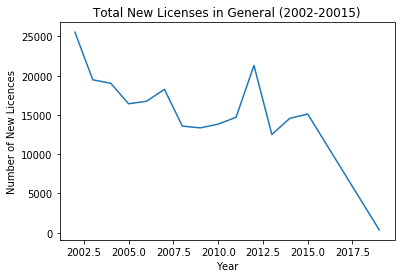

In [36]:
#Plot total number of licenses issued by year.

license_number = df_2.groupby(["LICENSE NUMBER"]).first()
license_number_year = license_number.groupby(["YEAR"]).count()
plt.plot("LEGAL NAME", data=license_number_year)
plt.xlabel("Year")
plt.ylabel("Number of New Licences")
plt.title("Total New Licenses in General (2002-20015)")

In [37]:
# Filter by license code (1006 corresponds to restaurants)
df_3 = df_2[df_2['LICENSE CODE'] == 1006]
df_3 = df_3.reset_index(drop=True)
#Reamining rows
df_3.shape

(122577, 13)

Text(0.5, 1.0, 'Restaurant New Licenses (2002-20015)')

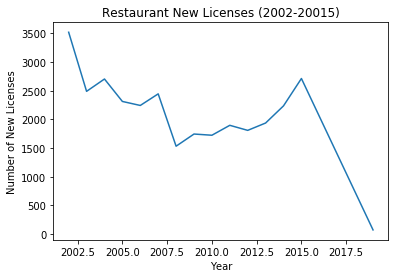

In [38]:
# Plot the number of restaurant licenses issued
license_number_rest = df_3.groupby(["LICENSE NUMBER"]).first()
license_number_year1 = license_number_rest.groupby(["YEAR"]).count()
plt.plot("LEGAL NAME", data=license_number_year1)
plt.xlabel("Year")
plt.ylabel("Number of New Licenses")
plt.title("Restaurant New Licenses (2002-20015)")

Text(0.5, 1.0, 'Restaurant Licenses Issued by Ward (2002-2015)')

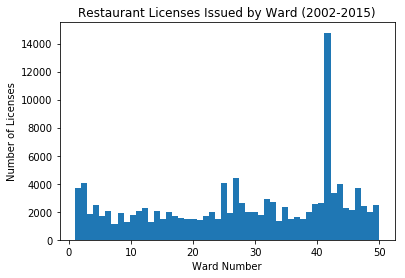

In [39]:
WARD = df_3['WARD']

plt.hist(WARD, 50)

plt.xlabel('Ward Number')
plt.ylabel('Number of Licenses')
plt.title('Restaurant Licenses Issued by Ward (2002-2015)')

In [40]:
renew = df_3[df_3['APPLICATION TYPE'] == 'RENEW']
issue = df_3[df_3['APPLICATION TYPE'] == 'ISSUE']


Text(0.5, 1.0, 'Restaurant Renewed Licenses (2002-2015)')

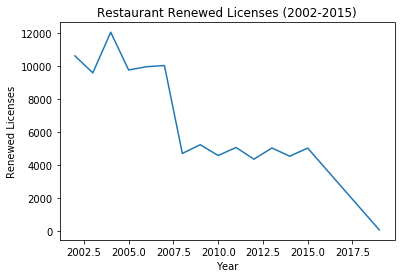

In [41]:
licenses_renew = renew.groupby(["YEAR"]).count()
plt.plot("WARD", data= licenses_renew)
plt.xlabel('Year')
plt.ylabel('Renewed Licenses')
plt.title('Restaurant Renewed Licenses (2002-2015)')

Text(0.5, 1.0, 'Restaurant Issued Licenses (2002-2015 )')

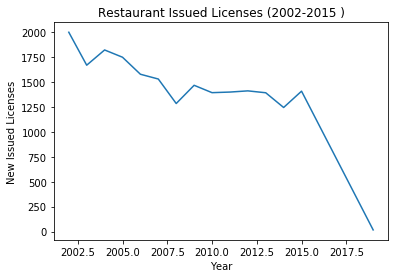

In [42]:
licenses_issue = issue.groupby(["YEAR"]).count()
plt.plot("WARD", data= licenses_issue)
plt.xlabel('Year')
plt.ylabel('New Issued Licenses')
plt.title('Restaurant Issued Licenses (2002-2015 )')